**Q1.** What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

In [2]:
import pandas as pd

df = pd.read_csv("D:\VIDEOS\PW Skills\Assignments\WEEK 14\winequality.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


**Fixed Acidity:**

Influences taste and structure.

Higher acidity contributes to a refreshing taste but excessive levels can lead to sourness.

**Volatile Acidity:**

Impacts wine flavor and aroma.

High levels can cause undesirable vinegar-like taste; controlling it is crucial.

**Citric Acid:**

Adds freshness and tanginess to wines.

Balanced levels enhance flavor profile, contributing positively to perceived quality.

**Residual Sugar:**

Determines wine sweetness.

Higher levels make wine sweeter; balancing is important for desired taste.

**Chlorides:**

Influences taste and mouthfeel.

Excessive content leads to undesirable salty or briny taste.

**Free Sulfur Dioxide:**

Acts as a preservative, preventing spoilage.

Affects wine stability and preservation.

**Total Sulfur Dioxide:**

Indicates overall preservation levels.

Includes both free and bound forms of sulfur dioxide.

**Density:**

Related to alcohol content and mouthfeel.

Affects perceived richness of the wine.

**pH:**

Affects stability, taste, and safety.

Balanced pH levels are crucial for harmonious taste.

**Sulphates:**

Contribute to wine preservation.

Can enhance certain flavors and aromas.

**Alcohol:**

Influences body, texture, and perceived quality.

Contributes to overall mouthfeel and taste profile.

**Q2.** How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

**Mean/Median/Mode Imputation:**

Advantages: Straightforward method, doesn't distort the distribution of the data significantly, and is quick to implement.

Disadvantages: Might not be suitable if missing values are significant, potentially underestimating variability and covariance.

**Forward Fill or Backward Fill (or Last Observation Carried Forward - LOCF):**

Advantages: Useful for time-series data or when missing values occur in a sequence. Preserves temporal order.

Disadvantages: May not be suitable for all datasets, particularly if the assumption of carrying forward or backward values is invalid.

In [4]:
import pandas as pd

numerical_cols = []
categorical_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)


Numerical Columns:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Categorical Columns:
['type']


In [5]:
# For numerical cols
for feature_name in numerical_cols:
    df[feature_name].fillna(df[feature_name].mean(), inplace=True)

# For categorical cols
for feature_name in categorical_cols:
    df[feature_name].fillna(df[feature_name].mode()[0], inplace=True)


**Q5.** Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

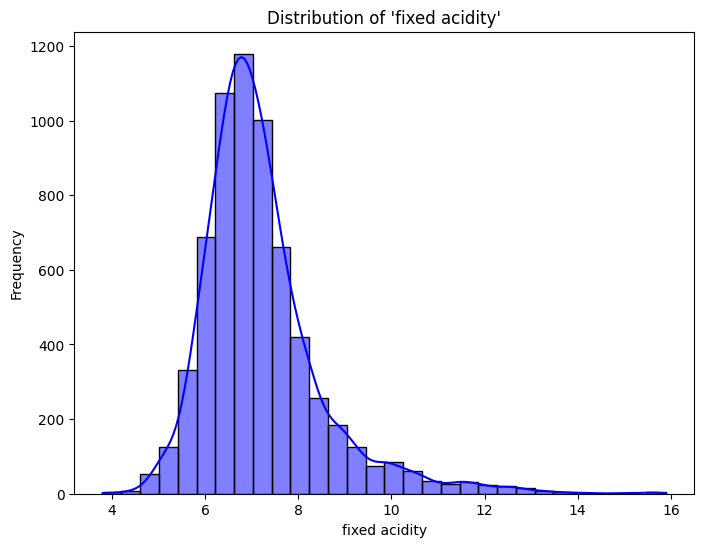

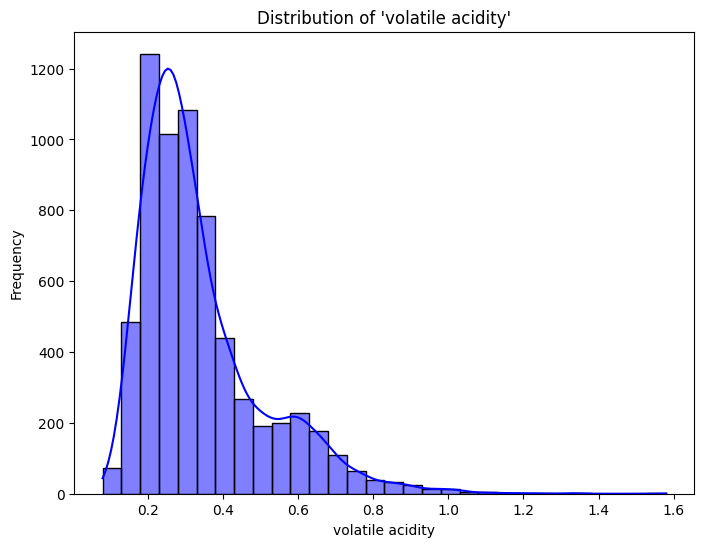

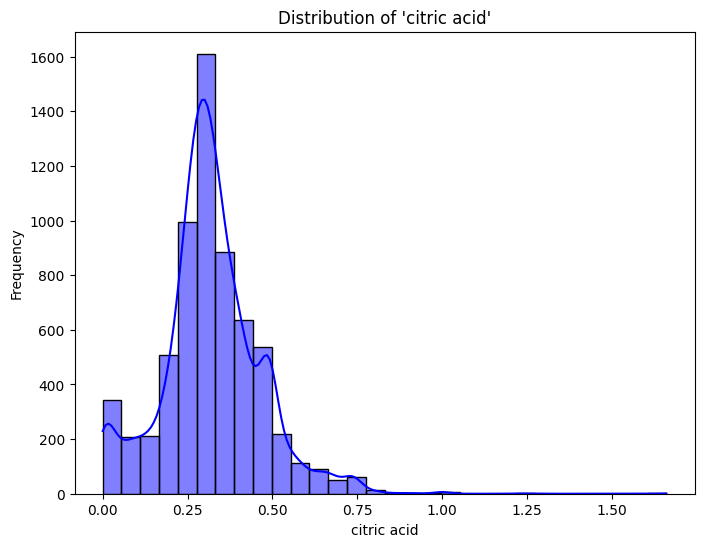

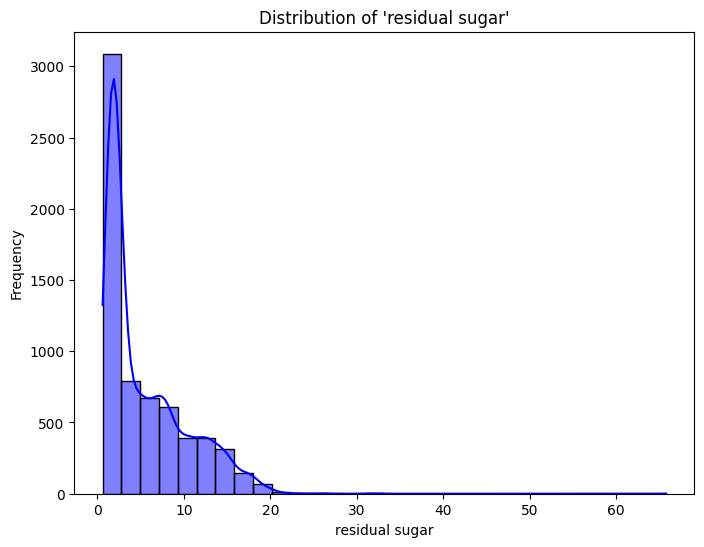

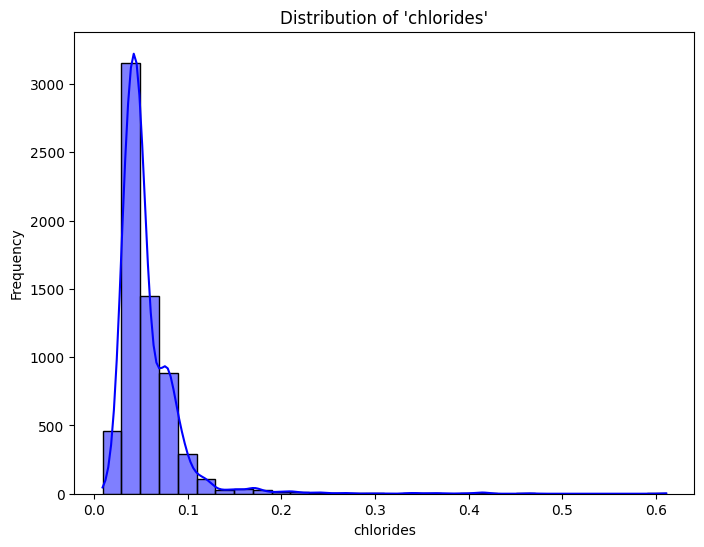

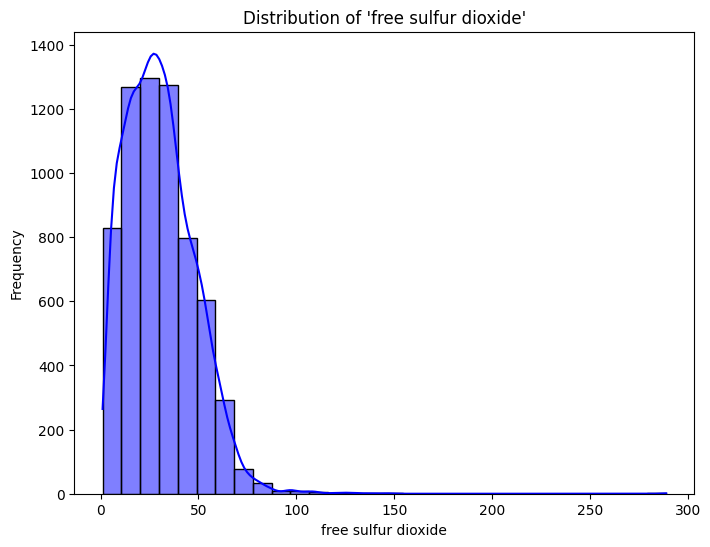

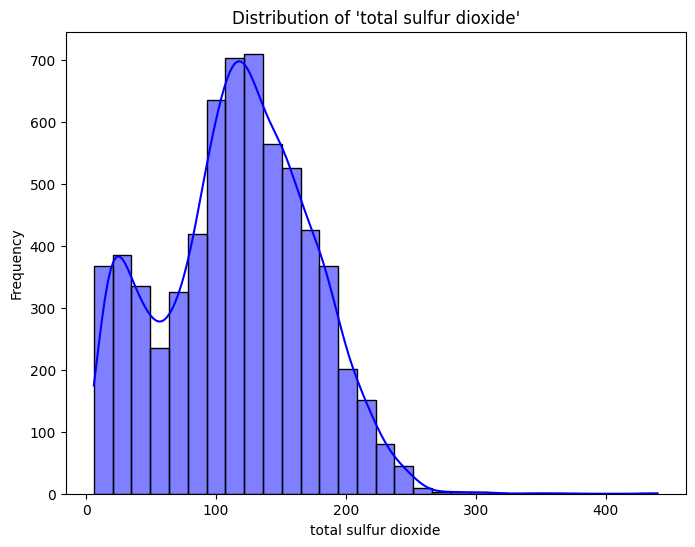

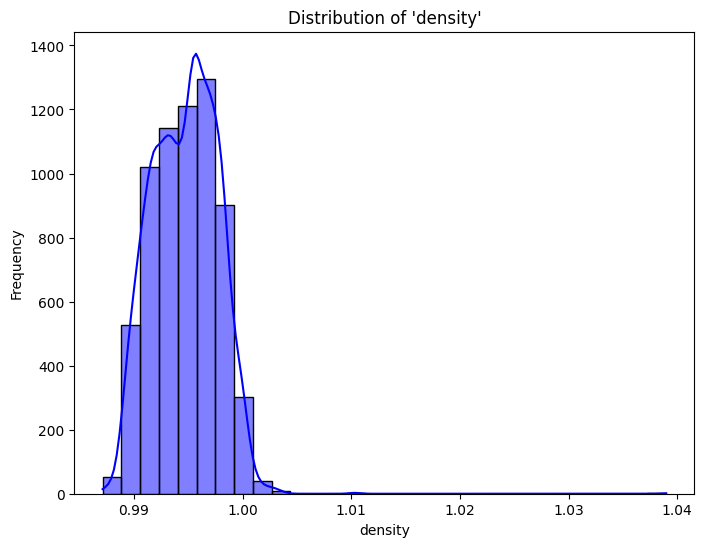

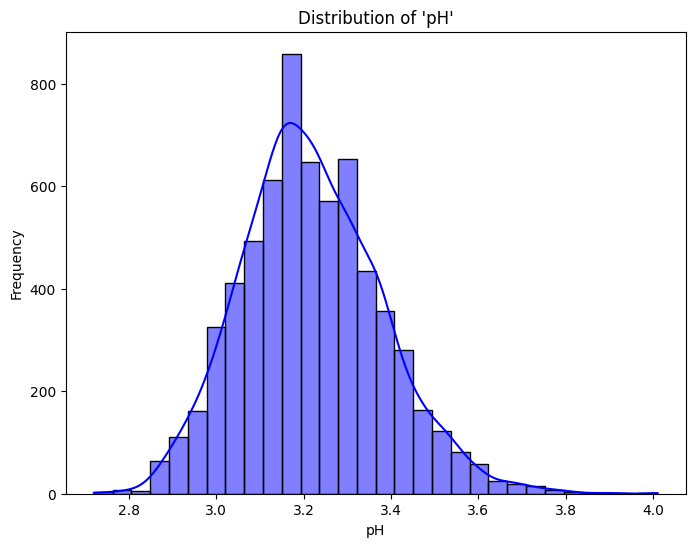

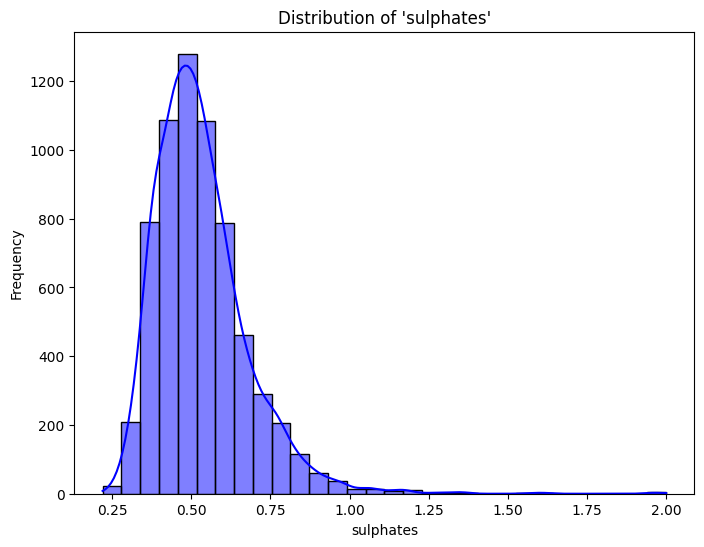

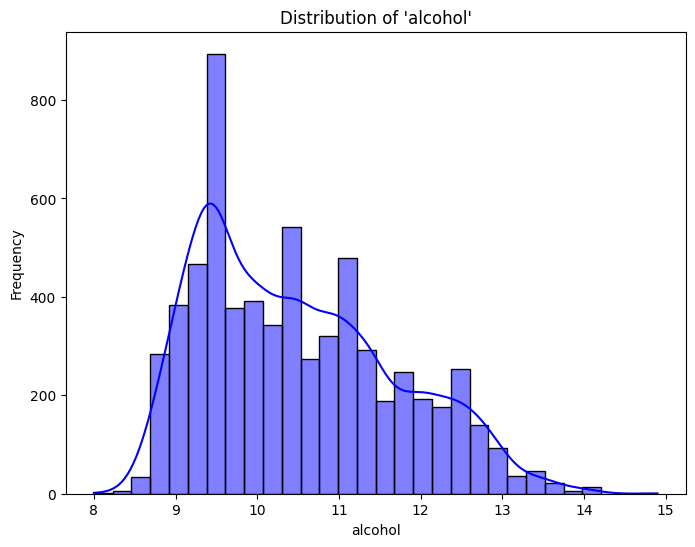

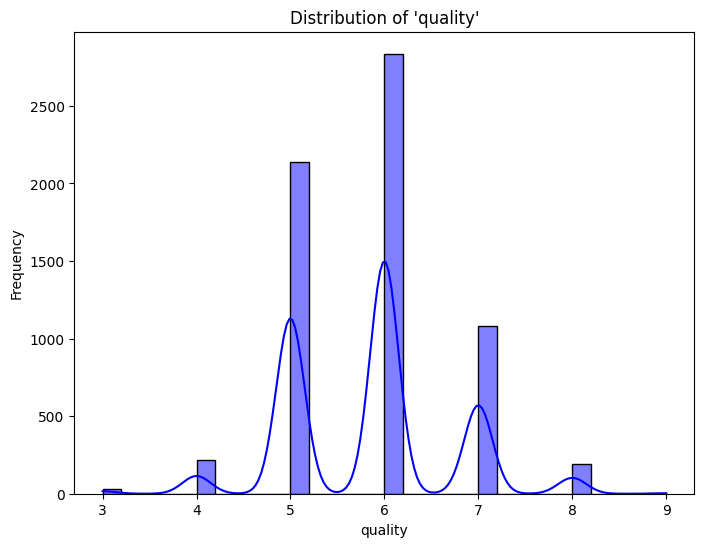

Features exhibiting non-normality:
['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'sulphates']


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

non_normal_features = []

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of '{col}'")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Check for skewness
    skewness = df[col].skew()
    if abs(skewness) > 1:
        non_normal_features.append(col)

print("Features exhibiting non-normality:")
print(non_normal_features)


**We can consider following transformations to improve normality**

**Logarithmic transformation:** Suitable for reducing right-skewedness.

**Square root transformation:** Helpful for reducing right-skewedness but less aggressive than logarithmic.

**Exponential transformation:** Useful for reducing left-skewedness.

**Q6.** Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Separate features and target variable

X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable

# Encoding categorical columns 
encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Find the minimum number of components to explain 90% of the variance
n_components_90 = (cumulative_variance_ratio >= 0.9).argmax() + 1

print(f"Minimum number of principal components to explain 90% variance: {n_components_90}")


Minimum number of principal components to explain 90% variance: 8


**Q3.** What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

In [15]:
df = pd.read_csv("D:\VIDEOS\PW Skills\Assignments\WEEK 14\stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Factors Affecting Students' Exam Performance:**

**Gender:**

Conduct t-tests or ANOVA to compare performance between male and female students in each subject.

**Race/Ethnicity:**

Use ANOVA or Tukey's test to identify performance differences among different racial or ethnic groups.

**Parental Level of Education:**

Use regression analysis to determine correlation between parental education levels and students' scores.

**Lunch:**

Perform t-tests to compare scores between students receiving free/reduced lunch and those with standard meals.

**Test Preparation Course:**

Use t-tests or regression to analyze if taking a test prep course impacts exam scores.

**Analytical Approaches:**

**Descriptive Statistics:**

Calculate mean, median, and standard deviation for each group/category.

**Visualizations:**

Use box plots, histograms, or bar charts to visualize score distributions among different groups.

**Hypothesis Testing:**

Apply appropriate statistical tests (t-tests, ANOVA) to determine significant score differences among groups.

**Correlation Analysis:**

Explore relationships between variables using correlation coefficients (e.g., parental education and test scores).

**Multivariate Analysis:**

Consider interactions among multiple factors to understand combined effects on performance.

**Q4.** Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

**Feature Selection:**

Identified key predictors like 'math_score', 'reading_score', and 'writing_score'.

Assessed correlations among variables to gauge their impact.

**Feature Transformation/Creation:**

Combined scores to create an overall academic performance metric.

Binary encoded categorical variables ('gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course').

Ordinally encoded education levels.

Scaled scores to a standard range for uniform contribution.

Potentially binned continuous variables into categorical grades.

**Considerations:**

Emphasized the relevance of math, reading, and writing scores.

Ensured categorical variables were machine-readable via encoding.

Computed an overall performance metric from individual scores.

Standardized numerical scores for consistent impact in modeling.

Used model-driven insights to assess feature importance.

In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

key_predictors = ['math_score', 'reading_score', 'writing_score']

# Aggregate scores into an overall academic metric
df['overall_score'] = df[key_predictors].mean(axis=1)

# Categorical variables for encoding
categorical_vars = ['gender', 'race_ethnicity', 'lunch', 'test_preparation_course']

# Binary encoding for categorical variables
binary_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = binary_encoder.fit_transform(df[categorical_vars])

# Manually construct feature names after encoding
encoded_columns = binary_encoder.get_feature_names_out(categorical_vars)
encoded_categorical = pd.DataFrame(encoded_categorical, columns=encoded_columns)

# Ordinal encoding for parental education level
ordinal_encoder = OrdinalEncoder()
df['parental_level_of_education_encoded'] = ordinal_encoder.fit_transform(df[['parental_level_of_education']])

# Combine encoded categorical features with the original DataFrame
df_encoded = pd.concat([df, encoded_categorical], axis=1)

# Scale numerical features
numeric_features = ['math_score', 'reading_score', 'writing_score', 'overall_score']
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Print or use df_encoded for modeling
print(df_encoded.head())


   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none    0.390024       0.193999       0.391492   
1               completed    0.192076       1.427476       1.313269   
2                    none    1.577711       1.770109       1.642475   
3                    none   -1.259543      -0.833899      -1.583744   
4                    none    0.653954       0.605158       0.457333   

   overall_score  parental_level_of_education_encoded  gender_male  \
0       0.343574                                  1.0          0.0   
1       1.02

c:\Users\rbrot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
